In [27]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
from scipy import optimize

## Q2

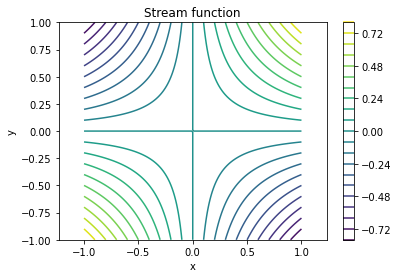

In [15]:

x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
psi = A * X * Y
CS = plt.contour(X, Y, psi, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stream function')
plt.show()

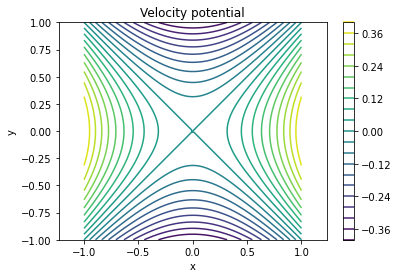

In [16]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
phi = A * (X**2 - Y**2) / 2
CS = plt.contour(X, Y, phi, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity potential')
plt.show()

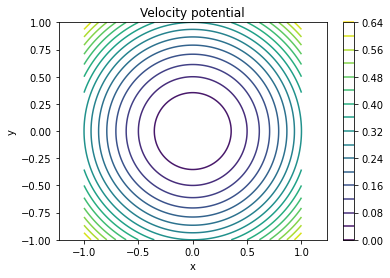

In [17]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
A = 0.8
P = A**2 * (X**2 + Y**2) / 2
CS = plt.contour(X, Y, P, 20)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Isobars')
plt.show()

## Q3

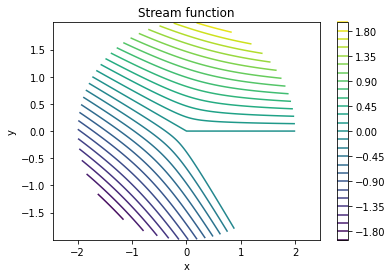

In [23]:
r = np.linspace(0, 2, 200)
theta = np.linspace(0, 5*np.pi/3, 100)
R, THETA = np.meshgrid(r, theta)
A = 0.8
psi = A * R ** (6/5) * np.sin(6 * THETA / 5)
X = R * np.cos(THETA)
Y = R * np.sin(THETA)
CS = plt.contour(X, Y, psi, 30)
plt.axis('equal')
plt.colorbar(CS)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stream function')
plt.show()

# Q5 solve

In [30]:
def f(x):
    return 1 / np.tan(np.pi / 0.1 * x) - x 

root = optimize.fsolve(f, 0.05)[0]

htoa = (0.1 / np.pi + 1) ** 0.5
print(htoa / root)

20.96198343627632


## Q9 plot

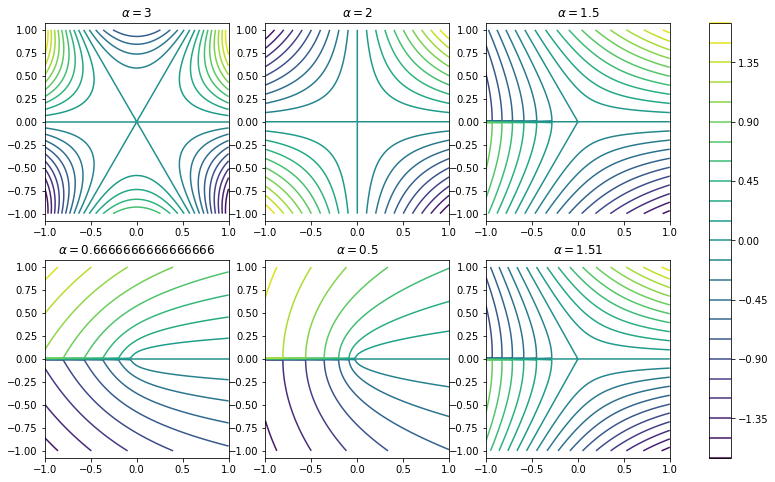

In [35]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y
A = 1.0
alphas = [3, 2, 3/2, 2/3, 1/2, 3/2 + 0.1]

fig,axes = plt.subplots(2, 3, figsize=(14, 8))
for ax, alpha in zip(axes.flat, alphas):
    FZ = A * Z ** alpha
    #ax.contour(X, Y, FZ.real, 20)
    CS = ax.contour(X, Y, FZ.imag, 20)
    ax.axis('equal')
    ax.set_title(r'$\alpha = {}$'.format(alpha))

plt.colorbar(CS, ax=axes.ravel().tolist())
plt.show()
